**CHAPTER 2 Data Cleansing with Apache Spark**

**2.1 Install Spark and PySpark**

2.1.1  Update all Package in this VM

In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xzvf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

2.1.2 Set enviroment variable make Python know Spark

In [132]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

2.1.3 Install PySpark version 3.5.1 in Python

In [ ]:
!pip install pyspark==3.5.1

2.1.4 Create Spark Session for use Spark

In [134]:
from pyspark.sql import SparkSession
spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Road to Data Engineer 3.0 App") \
    .getOrCreate()

2.1.5 Get the data from chapter 1

In [ ]:
!wget https://file.designil.com/f/6BamyF+ -O w2_input.parquet
dt = spark.read.parquet('w2_input.parquet')

**2.2 Data Profiling**

2.2.1 Show all column and data type


In [136]:
dt

DataFrame[transaction_id: string, date: string, product_id: string, price: double, quantity: bigint, customer_id: double, product_name: string, customer_country: string, customer_name: string, total_amount: double, thb_amount: double]

2.2.2 Show data detail each of column

In [137]:
dt.show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

2.2.3 Show data detail each of column just 10 rows.



In [138]:
dt.show(10)

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

2.2.4 Show data detail each of column just 10 rows and no show “….”.

In [139]:
dt.show(10, truncate = False)

+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+-------------+------------------+------------------+
|transaction_id|date      |product_id|price|quantity|customer_id|product_name                       |customer_country|customer_name|total_amount      |thb_amount        |
+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+-------------+------------------+------------------+
|581482        |2024-05-10|22485     |21.47|12      |17490.0    |Set Of 2 Wooden Market Crates      |United Kingdom  |Sara Griffin |257.64            |11792.1828        |
|581475        |2024-05-10|22596     |10.65|36      |13069.0    |Christmas Star Wish List Chalkboard|United Kingdom  |Michael Holt |383.40000000000003|17548.218000000004|
|581475        |2024-05-10|23235     |11.53|12      |13069.0    |Storage Tin Vintage Leaf           |United Kingdom  |Michael Holt |138.359999999

2.2.5 Show data types each of column

In [140]:
dt.dtypes

[('transaction_id', 'string'),
 ('date', 'string'),
 ('product_id', 'string'),
 ('price', 'double'),
 ('quantity', 'bigint'),
 ('customer_id', 'double'),
 ('product_name', 'string'),
 ('customer_country', 'string'),
 ('customer_name', 'string'),
 ('total_amount', 'double'),
 ('thb_amount', 'double')]

2.2.6 Count row and column

In [141]:
print((dt.count(), len(dt.columns)))

(536350, 11)


2.2.7 Summary statistic data

In [142]:
dt.describe().show()
#or
dt.summary().show()

+-------+------------------+----------+------------------+------------------+------------------+------------------+--------------------+----------------+-------------+------------------+--------------------+
|summary|    transaction_id|      date|        product_id|             price|          quantity|       customer_id|        product_name|customer_country|customer_name|      total_amount|          thb_amount|
+-------+------------------+----------+------------------+------------------+------------------+------------------+--------------------+----------------+-------------+------------------+--------------------+
|  count|            536350|    536350|            536350|            536350|            536350|            536295|              536350|          536350|       536350|            536350|              536350|
|   mean| 559978.9296258752|      NULL|27501.334602703962|12.662182287696377| 9.919347441036637|15227.893178194838|                NULL|            NULL|         NULL|1

2.2.8 Summary statistic data especially identified column

In [143]:
dt.select("price").describe().show()

+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            536350|
|   mean|12.662182287696377|
| stddev| 8.490450200816936|
|    min|              5.13|
|    max|            660.62|
+-------+------------------+



2.2.9 Which columns have missing values ​​and show the rows with missing values.

In [144]:
dt.summary("count").show()

+-------+--------------+------+----------+------+--------+-----------+------------+----------------+-------------+------------+----------+
|summary|transaction_id|  date|product_id| price|quantity|customer_id|product_name|customer_country|customer_name|total_amount|thb_amount|
+-------+--------------+------+----------+------+--------+-----------+------------+----------------+-------------+------------+----------+
|  count|        536350|536350|    536350|536350|  536350|     536295|      536350|          536350|       536350|      536350|    536350|
+-------+--------------+------+----------+------+--------+-----------+------------+----------------+-------------+------------+----------+



2.2.10 Due to column of customer less than another column

In [145]:
dt.where( dt.customer_id.isNull() ).show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+-------------------+-------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|       total_amount|         thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+-------------------+-------------------+
|       C581406|2024-05-09|    46000M| 6.19|    -240|       NULL|Polyester Filler ...|  United Kingdom| Allen Morgan|-1485.6000000000001|         -68397.024|
|       C581406|2024-05-09|    46000S| 6.19|    -300|       NULL|Polyester Filler ...|  United Kingdom| Allen Morgan|-1857.0000000000002| -85496.28000000001|
|       C575153|2024-04-09|     22947|44.25|      -1|       NULL|Wooden Advent Cal...|  United Kingdom| Allen Morgan|             -44.25|-2036.4734999999998|
|       C574288|2024-04-04|     22178|25.37|      -1

2.2.11 YData Profiling is tooling make easily EDA

In [ ]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport
profile = ProfileReport(dt.toPandas(), title="Profiling Report")

profile

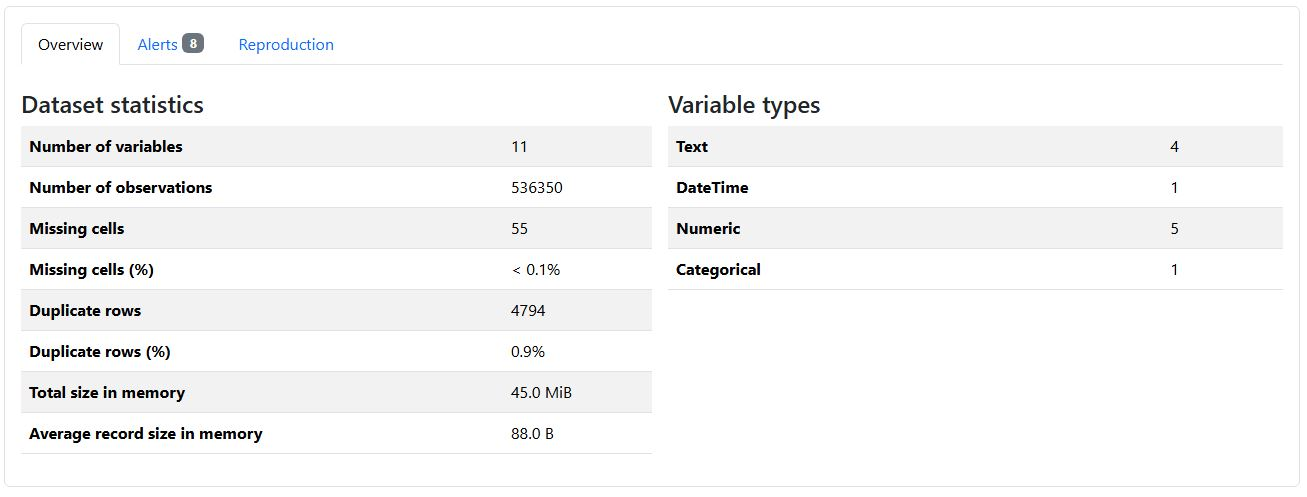

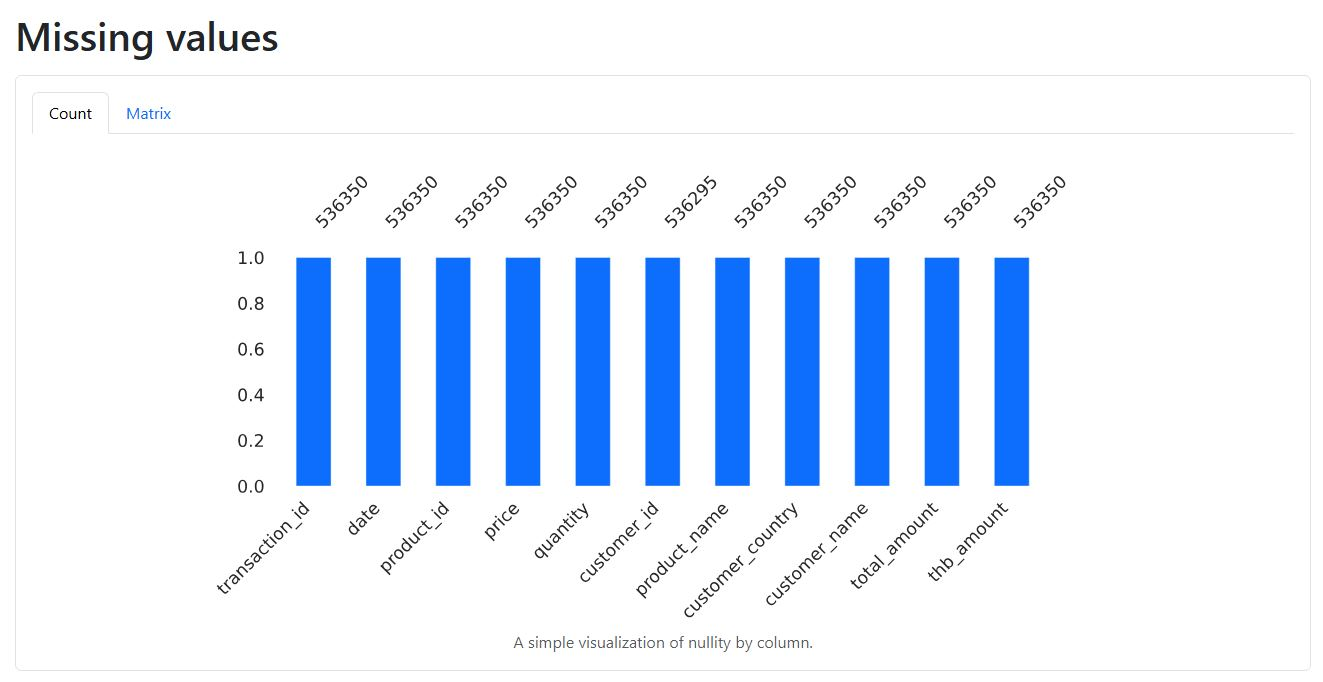

**2.3 EDA - Exploratory Data Analysis**

2.3.1 Non-Graphical EDA

2.3.1.1 Numeric data

In [147]:
dt.where(dt.price >= 100).show()

+--------------+----------+----------+------+--------+-----------+--------------------+----------------+--------------------+------------+------------------+
|transaction_id|      date|product_id| price|quantity|customer_id|        product_name|customer_country|       customer_name|total_amount|        thb_amount|
+--------------+----------+----------+------+--------+-----------+--------------------+----------------+--------------------+------------+------------------+
|        577130|2024-04-18|     22827|179.37|       1|    15861.0|Rustic Seventeen ...|  United Kingdom|        Kelly Barnes|      179.37|        8207.79183|
|       C577131|2024-04-18|     22827|179.37|      -1|    15861.0|Rustic Seventeen ...|  United Kingdom|        Kelly Barnes|     -179.37|       -8207.79183|
|        576635|2024-04-17|     22828|158.88|       2|    15269.0|Regency Mirror Wi...|  United Kingdom|     Jerry Henderson|      317.76|         14545.464|
|        576512|2024-04-16|     22823| 123.0|       

2.3.1.2 Alphabet data

In [148]:
dt.where(dt.customer_country == 'Australia').show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+----------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|   customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+----------------+------------------+------------------+
|        578459|2024-04-25|     22338| 6.19|      96|    12388.0|Star Decoration P...|       Australia|Stephanie Morris|            594.24|27531.139199999998|
|        578459|2024-04-25|     22600| 6.19|      20|    12388.0|Christmas Retrosp...|       Australia|Stephanie Morris|123.80000000000001|          5735.654|
|        578459|2024-04-25|     22910| 6.19|      20|    12388.0|Paper Chain Kit V...|       Australia|Stephanie Morris|123.80000000000001|          5735.654|
|        578459|2024-04-25|     22086| 6.19|  

2.3.1.3 How many rows of total purchases occurred in May 2024?

In [149]:
dt.where( dt.date.startswith("2024-05") ).count()

28771

2.3.2 Graphical EDA

2.3.2.1 Spark is not designed for plotting data, so we will use pandas with the seaborn, matplotlib packages to plot the data instead.

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

2.3.2.2 Convert Spark Dataframe to Pandas Dataframe

In [151]:
dt_pd = dt.toPandas()
dt_pd.head()

,transaction_id,date,product_id,price,quantity,customer_id,product_name,customer_country,customer_name,total_amount,thb_amount
0,581482,2024-05-10,22485,21.47,12,17490.0,Set Of 2 Wooden Market Crates,United Kingdom,Sara Griffin,257.64,11792.1828
1,581475,2024-05-10,22596,10.65,36,13069.0,Christmas Star Wish List Chalkboard,United Kingdom,Michael Holt,383.40,17548.2180
2,581475,2024-05-10,23235,11.53,12,13069.0,Storage Tin Vintage Leaf,United Kingdom,Michael Holt,138.36,6332.7372
3,581475,2024-05-10,23272,10.65,12,13069.0,Tree T-Light Holder Willie Winkie,United Kingdom,Michael Holt,127.80,5849.4060
4,581475,2024-05-10,23239,11.94,6,13069.0,Set Of 4 Knick Knack Tins Poppies,United Kingdom,Michael Holt,71.64,3278.9628


2.3.3 Boxplot

In [ ]:
sns.boxplot(x = dt_pd['price'])

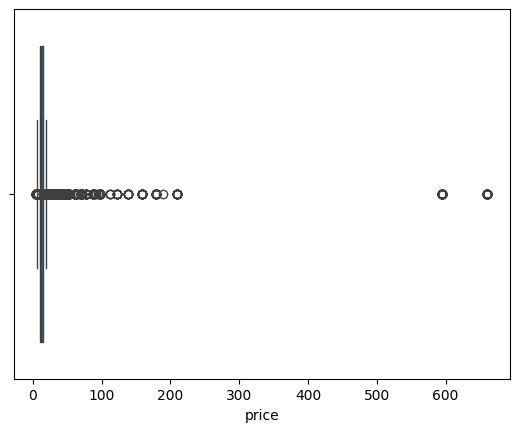

2.3.4 Histogram

In [ ]:
sns.histplot(dt_pd['price'], bins=10)

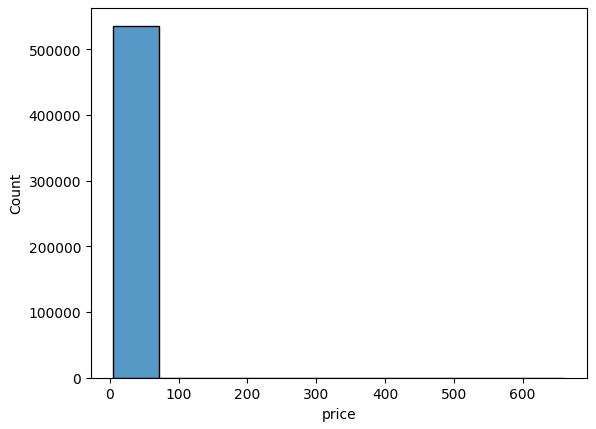

2.3.4.1 Added bin to show more detailed information

In [ ]:
sns.histplot(dt_pd['price'], bins=100)

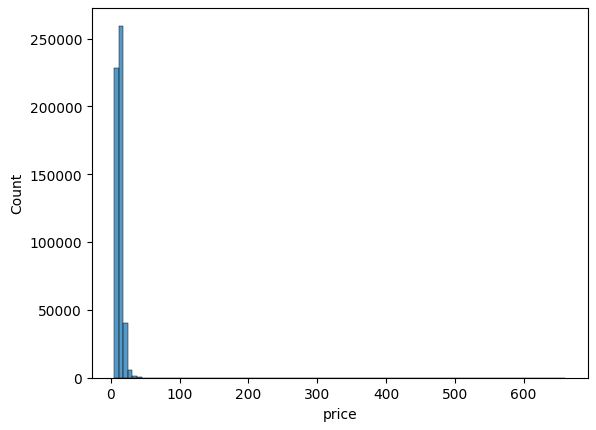

2.3.4.2 Zoom in graph detail

In [ ]:
sns.histplot(dt_pd[dt_pd['price'] < 40]['price'], bins=10)

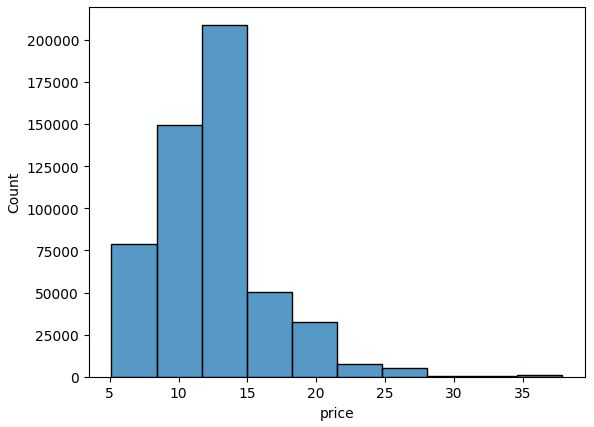

2.3.5 Scatterplot

In [ ]:
sns.scatterplot(x=dt_pd.quantity, y=dt_pd.price)

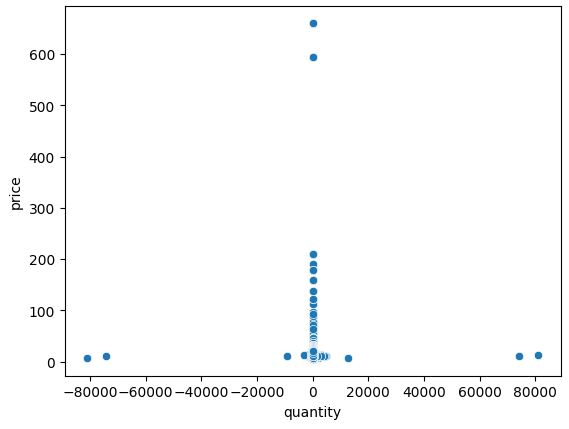

2.3.6 interactive chart with Plotly

In [ ]:
import plotly.express as px
fig = px.scatter(dt_pd, 'customer_id', 'price')
fig.show()

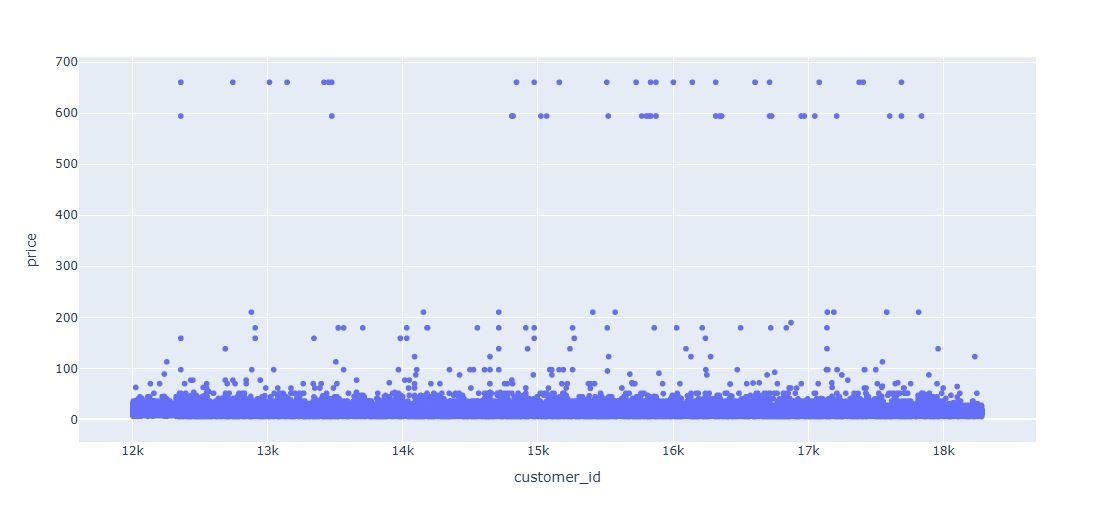

2.3.7 Data Visualization & EDA data with PyGWalker

In [ ]:
!pip install pygwalker
import pygwalker as pyg
pyg.walk(dt.toPandas())

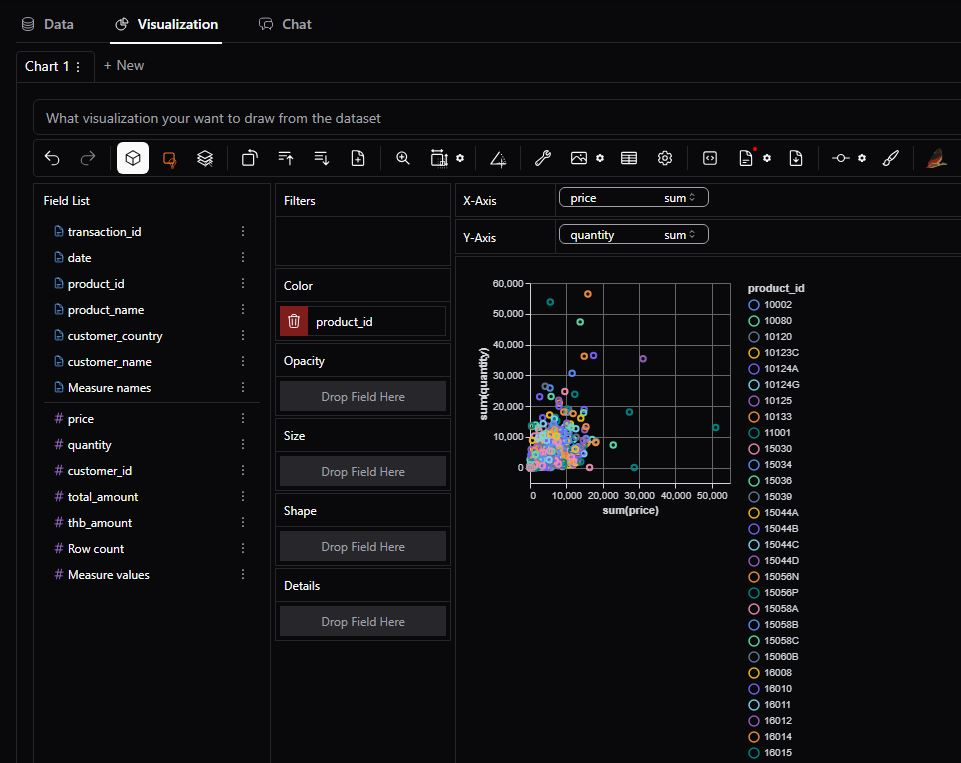

**2.4 Data Cleansing with PySpark**

2.4.1 Data type

One of the most common problems encountered with data is that the Data Type does not match what we want.

2.4.1.1 Show data

In [159]:
dt.show(truncate=False)

+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+-------------+------------------+------------------+
|transaction_id|date      |product_id|price|quantity|customer_id|product_name                       |customer_country|customer_name|total_amount      |thb_amount        |
+--------------+----------+----------+-----+--------+-----------+-----------------------------------+----------------+-------------+------------------+------------------+
|581482        |2024-05-10|22485     |21.47|12      |17490.0    |Set Of 2 Wooden Market Crates      |United Kingdom  |Sara Griffin |257.64            |11792.1828        |
|581475        |2024-05-10|22596     |10.65|36      |13069.0    |Christmas Star Wish List Chalkboard|United Kingdom  |Michael Holt |383.40000000000003|17548.218000000004|
|581475        |2024-05-10|23235     |11.53|12      |13069.0    |Storage Tin Vintage Leaf           |United Kingdom  |Michael Holt |138.359999999

2.4.1.2 Show schema

In [160]:
dt.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- thb_amount: double (nullable = true)



2.4.1.3 You can see that date is read as a string, but we want it to be a date and time. How do we do that? First, we need to look at what the date column looks like.

In [161]:
dt.select("date").show(10)

+----------+
|      date|
+----------+
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
|2024-05-10|
+----------+
only showing top 10 rows



2.4.1.4 Convert string to datetime

In [162]:
from pyspark.sql import functions as f
dt_clean = dt.withColumn("date",
                        f.to_timestamp(dt.date, 'yyyy-MM-dd')
                        )
dt_clean.show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        5

2.4.1.5 Tips: If you use the standard Date format, you don't need to specify the Date Format when coding to_timestamp.

In [163]:
dt_clean = dt.withColumn("date",
                        f.to_timestamp(dt.date)
                        )
dt_clean.show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        5

2.4.1.6 Check from mix, max of date column to see if the data is complete.

In [164]:
dt_clean.select(
    f.min(dt_clean.date),
    f.max(dt_clean.date)
).show()

dt_clean.printSchema()

+-------------------+-------------------+
|          min(date)|          max(date)|
+-------------------+-------------------+
|2023-05-03 00:00:00|2024-05-10 00:00:00|
+-------------------+-------------------+

root
 |-- transaction_id: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- product_name: string (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- customer_name: string (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- thb_amount: double (nullable = true)



2.4.1.7 Counting transactions for the first half of January 2024

In [165]:
dt_clean.where( (f.dayofmonth(dt_clean.date) <= 15) & ( f.month(dt_clean.date) == 1 ) & ( f.year(dt_clean.date) == 2024 ) ).count()

16398

2.4.1.8 Tips: Sometimes we don't convert Data type, but Spark is smart, it automatically converts String -> Timestamp.

In [166]:
dt.where( (f.dayofmonth(dt.date) <= 15) & ( f.month(dt.date) == 1 ) & ( f.year(dt.date) == 2024 ) ).count()

16398

2.4.2 Anomalies Check

2.4.2.1 Syntactical Anomalies > Lexical errors. Find the misspelled country name and correct the misspelled name.


In [167]:
dt_clean.select("customer_country").distinct().count()
dt_clean.select("customer_country").distinct().sort("customer_country").show( 40 )

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|              Japane|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



2.4.2.2 Correct misspelled name

In [168]:
dt_clean.where(dt_clean['customer_country'] == 'Japane').show()
from pyspark.sql.functions import when
dt_clean_country = dt_clean.withColumn("customer_country_update", when(dt_clean['customer_country'] == 'Japane', 'Japan').otherwise(dt_clean['customer_country']))

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|total_amount| thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------+-----------+
|        566623|2024-02-14 00:00:00|     21787|11.12|      72|    12756.0|Rain Poncho Retro...|          Japane|    Troy Ball|      800.64|36331.44192|
|        566623|2024-02-14 00:00:00|     21786|10.68|      24|    12756.0|   Polkadot Rain Hat|          Japane|    Troy Ball|      256.32|11631.28896|
|        566623|2024-02-14 00:00:00|     21789|11.12|      24|    12756.0|  Kids Rain Mac Pink|          Japane|    Troy Ball|      266.88|12110.48064|
|        566623|2024-02-14 00:00:00|     21788|11.12|      24|    12756.0|  Kids Rain Ma

2.4.2.3 Replace the country column with the customer_country_update column.

In [169]:
dt_clean_v2 = dt_clean_country.drop("customer_country").withColumnRenamed('customer_country_update', 'customer_country')
dt_clean_v2[ dt_clean_v2.transaction_id == '576923' ].show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+------------------+------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_name|      total_amount|        thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+------------------+------------------+----------------+
|        576923|2024-04-18 00:00:00|     23009|25.57|      18|    12753.0|I Love London Bab...| Sandra Black|            460.26|       21061.03734|           Japan|
|        576923|2024-04-18 00:00:00|     22660|17.51|      50|    12753.0|Doormat I Love Lo...| Sandra Black| 875.5000000000001|        40062.0045|           Japan|
|        576923|2024-04-18 00:00:00|     20750|16.76|      48|    12753.0|Red Retrospot Min...| Sandra Black|            804.48|       36812.20032|           Japan|
|        5

2.4.3 Semantic Anomalies > Integrity constraints. The value is outside the range of acceptable values, for example, product_id is longer than it should be.

2.4.3.1 Show product_id data

In [170]:
dt_clean_v2.select("product_id").show(100)

+----------+
|product_id|
+----------+
|     22485|
|     22596|
|     23235|
|     23272|
|     23239|
|     21705|
|     22118|
|     22119|
|     22217|
|     22216|
|     22380|
|     22442|
|     22664|
|     22721|
|     22723|
|     22785|
|     22955|
|     23141|
|     22956|
|     22581|
|     23198|
|     23197|
|     23184|
|     23168|
|     23167|
|     23166|
|     23165|
|     23004|
|     23002|
|     23000|
|     22998|
|     22994|
|     22835|
|     22730|
|     22728|
|     22727|
|     22726|
|     22720|
|     22693|
|     22670|
|     22667|
|     22666|
|     22631|
|     22628|
|     22467|
|     22197|
|     22114|
|     22112|
|     21908|
|     21874|
|     21872|
|     21871|
|     21533|
|     21481|
|     21479|
|     21248|
|     21216|
|     21181|
|     21175|
|     21169|
|     21162|
|     21159|
|     21158|
|     21154|
|     16016|
|     16014|
|     16008|
|     85152|
|    84596F|
|    84596B|
|    84510A|
|     82600|
|     82581|
|     72232|

2.4.3.2 Count row of product_id

In [171]:
dt_clean_v2.select("product_id").count()

536350

2.4.3.3 Replace product_id values ​​that exceed 5 characters with all 5 characters.

2.4.3.3.1 Find out if product_id is all 5 letters.


In [172]:
dt_clean_v2.where(dt_clean_v2["product_id"].rlike("^.{5}$")).count() / dt_clean_v2.count()

0.9050601286473385

2.4.3.3.2 Let's take a look at what inaccurate information looks like.

In [173]:
dt_correct_product = dt_clean_v2.filter(dt_clean_v2["product_id"].rlike("^.{5}$"))
dt_incorrect_product = dt_clean_v2.subtract(dt_correct_product)

dt_incorrect_product.show(10)

+--------------+-------------------+----------+-----+--------+-----------+--------------------+---------------+------------------+------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|  customer_name|      total_amount|        thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+---------------+------------------+------------------+----------------+
|        581480|2024-05-10 00:00:00|    84029E|14.61|       8|    14441.0|Red Woolly Hottie...|    Thomas Hull|            116.88|         5349.5976|  United Kingdom|
|        580727|2024-05-06 00:00:00|    47504H| 5.97|       6|    14096.0|English Rose Spir...|Christine Doyle|             35.82|         1652.7348|  United Kingdom|
|        580727|2024-05-06 00:00:00|    85231B| 7.24|       1|    14096.0|Cinammon Set Of 9...|Christine Doyle|              7.24|          334.0536|  United Kingdom

2.4.3.3.3 Check again to see what the letters after product_id mean.

In [174]:
dt_clean_v2.where( dt_clean_v2['product_id'].startswith('15044') ).select('product_id', 'product_name').show(truncate = False)

+----------+--------------------+
|product_id|product_name        |
+----------+--------------------+
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044D    |Red Paper Parasol   |
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044A    |Pink Paper Parasol  |
|15044D    |Red Paper Parasol   |
|15044D    |Red Paper Parasol   |
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044D    |Red Paper Parasol   |
|15044A    |Pink Paper Parasol  |
|15044C    |Purple Paper Parasol|
|15044C    |Purple Paper Parasol|
|15044D    |Red Paper Parasol   |
|15044D    |Red Paper Parasol   |
|15044C    |Purple Paper Parasol|
|15044A    |Pink Paper Parasol  |
|15044A    |Pink Paper Parasol  |
|15044A    |Pink Paper Parasol  |
+----------+--------------------+
only showing top 20 rows



2.4.3.3.4 Let's replace the product_id value.

In [175]:
dt_clean_v3 = dt_clean_v2.withColumn('product_id', f.substring('product_id', 1, 5))

2.4.3.3.5 Check the result

In [176]:
dt_correct_product = dt_clean_v3.filter(dt_clean_v3["product_id"].rlike("^.{5}$"))
dt_incorrect_product = dt_clean_v3.subtract(dt_correct_product)

dt_incorrect_product.show(10)

+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+



2.4.4 Missing values

2.4.4.1 Method 1

In [177]:
from pyspark.sql.functions import col, sum

dt_nulllist = dt_clean_v3.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_clean_v3.columns ])

dt_nulllist.show()

+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|             0|   0|         0|    0|       0|         55|           0|            0|           0|         0|               0|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+



2.4.4.1 Method 2

In [178]:
dt_clean_v3.summary("count").show()

+-------+--------------+----------+------+--------+-----------+------------+-------------+------------+----------+----------------+
|summary|transaction_id|product_id| price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+-------+--------------+----------+------+--------+-----------+------------+-------------+------------+----------+----------------+
|  count|        536350|    536350|536350|  536350|     536295|      536350|       536350|      536350|    536350|          536350|
+-------+--------------+----------+------+--------+-----------+------------+-------------+------------+----------+----------------+



2.4.4.2 Look at the data to see which rows have customer_id is Null

In [179]:
dt_clean_v3.where( dt_clean_v3.customer_id.isNull() ).show()

+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+-------------------+-------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_name|       total_amount|         thb_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+-------------+-------------------+-------------------+----------------+
|       C581406|2024-05-09 00:00:00|     46000| 6.19|    -240|       NULL|Polyester Filler ...| Allen Morgan|-1485.6000000000001|         -68397.024|  United Kingdom|
|       C581406|2024-05-09 00:00:00|     46000| 6.19|    -300|       NULL|Polyester Filler ...| Allen Morgan|-1857.0000000000002| -85496.28000000001|  United Kingdom|
|       C575153|2024-04-09 00:00:00|     22947|44.25|      -1|       NULL|Wooden Advent Cal...| Allen Morgan|             -44.25|-2036.4734999999998|  United Kingdom

2.4.4.3 Coding to replace Null with 00000

In [180]:
dt_clean_v4 = dt_clean_v3.withColumn("customer_id", when(dt_clean_v3['customer_id'].isNull(), '00000').otherwise(dt_clean_v3['customer_id']))

2.4.4.4 Check if the NULL user ID is really gone.

In [181]:
dt_clean_v4.where( dt_clean_v4.customer_id.isNull() ).show()

+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_name|total_amount|thb_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+
+--------------+----+----------+-----+--------+-----------+------------+-------------+------------+----------+----------------+



2.4.5 Outliers

2.4.5.1 Use Boxplot to find outliers in product prices.

In [ ]:
sns.boxplot(x = dt_clean_v4.toPandas()['price'])

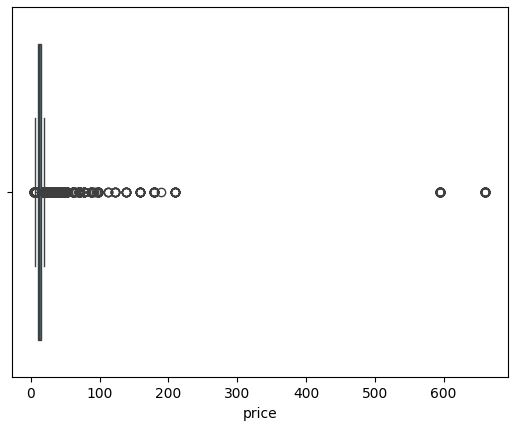

2.4.5.2 As you can see, there are many products that are priced higher than most of the data. Let's take a look at which products are priced over $600.

In [183]:
dt_clean_v4.where( dt_clean_v4.price > 600 ).select("product_id", "product_name", "price").distinct().show(truncate = False)

+----------+----------------------------+------+
|product_id|product_name                |price |
+----------+----------------------------+------+
|22656     |Vintage Blue Kitchen Cabinet|660.62|
|22655     |Vintage Red Kitchen Cabinet |660.62|
+----------+----------------------------+------+



2.4.6 Clean Data with Spark SQL

2.4.6.1 Convert data from Spark DataFrame to TempView.

In [184]:
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")

dt_sql.show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

2.4.6.2 Try converting the code for the country list to SQL.

In [185]:
dt_sql_country = spark.sql("""
SELECT distinct customer_country
FROM data
ORDER BY customer_country
""")

dt_sql_country.show(100)

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|              Japane|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



2.4.6.3 Try converting the code to replace country names into SQL.

In [186]:
dt_sql_transform = spark.sql("""
SELECT
    transaction_id,
    date,
    product_id,
    price,
    quantity,
    customer_id,
    product_name,
    CASE WHEN customer_country = 'Japane' THEN 'Japan' ELSE customer_country END AS customer_country,
    customer_name,
    total_amount,
    thb_amount
FROM
    data
""")

dt_sql_transform.show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

2.4.6.4 Check the result

In [187]:
dt_sql_transform.select("customer_country").distinct().sort("customer_country").show(50)

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



2.4.7 Find out if product_id is all 5 letters with SQL.

In [188]:
dt_sql_check_productid = spark.sql("""
SELECT *
FROM data
WHERE product_id NOT RLIKE '^.{5}$'
""").show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+--------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country| customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+--------------+------------------+------------------+
|        581476|2024-05-10|    84596F|10.68|      32|    12433.0|Small Marshmallow...|          Norway|Kelli Sandoval|            341.76|        15642.3552|
|        581476|2024-05-10|    84596B|10.68|      16|    12433.0|Small Dolly Mix D...|          Norway|Kelli Sandoval|            170.88|         7821.1776|
|        581476|2024-05-10|    84510A|11.53|      20|    12433.0|Set Of 4 English ...|          Norway|Kelli Sandoval|             230.6|         10554.562|
|        581476|2024-05-10|    47559B|11.53|      10|    1

2.4.7.1 Use CASE WHEN to replace the product_id value.

In [189]:
dt_sql_productid_clean = spark.sql("""
SELECT
    transaction_id,
    date,
    CASE
      WHEN length(product_id) > 5
      THEN substr(product_id, 1, 5)
      ELSE product_id
    END AS product_id,
    price,
    quantity,
    customer_id,
    product_name,
    customer_country,
    customer_name,
    total_amount,
    thb_amount
FROM
    data
""")
dt_sql_productid_clean.show()

+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+----------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0

2.2.7.2 Check the result

In [190]:
dt_sql_productid_clean.filter(~dt_sql_productid_clean["product_id"].rlike("^.{5}$")).show()

+--------------+----+----------+-----+--------+-----------+------------+----------------+-------------+------------+----------+
|transaction_id|date|product_id|price|quantity|customer_id|product_name|customer_country|customer_name|total_amount|thb_amount|
+--------------+----+----------+-----+--------+-----------+------------+----------------+-------------+------------+----------+
+--------------+----+----------+-----+--------+-----------+------------+----------------+-------------+------------+----------+



2.2.8 Parquet Export

In [193]:
dt_clean.write.parquet("cleaned_data.parquet")

2.2.8.1 Test read file

In [194]:
dt2 = spark.read.parquet("cleaned_data.parquet")
dt2.show(10)

+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|        product_name|customer_country|customer_name|      total_amount|        thb_amount|
+--------------+-------------------+----------+-----+--------+-----------+--------------------+----------------+-------------+------------------+------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|Set Of 2 Wooden M...|  United Kingdom| Sara Griffin|            257.64|        11792.1828|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|Christmas Star Wi...|  United Kingdom| Michael Holt|383.40000000000003|17548.218000000004|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|Storage Tin Vinta...|  United Kingdom| Michael Holt|138.35999999999999|         6332.7372|
|        5